## Tour & Travels Customer Churn Prediction

### Project Introduction

### About this dataset
The Tour & Travels Customer Churn Prediction dataset assists a travel company in
predicting customer churn. It includes indicators such as age, frequent flyer status,
annual income class, services opted frequency, social media account
synchronization, and hotel bookings.

In [1]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction")

Skipping, found downloaded files in ".\tour-travels-customer-churn-prediction" (use force=True to force download)


In [2]:

## importing library
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import scipy.optimize as opt

%matplotlib inline


In [3]:
## importing the datasets. 
df = pd.read_csv("tour-travels-customer-churn-prediction/Customertravel.csv")
print("done")

done


### EDA Before Preprocessing

In [4]:
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [8]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


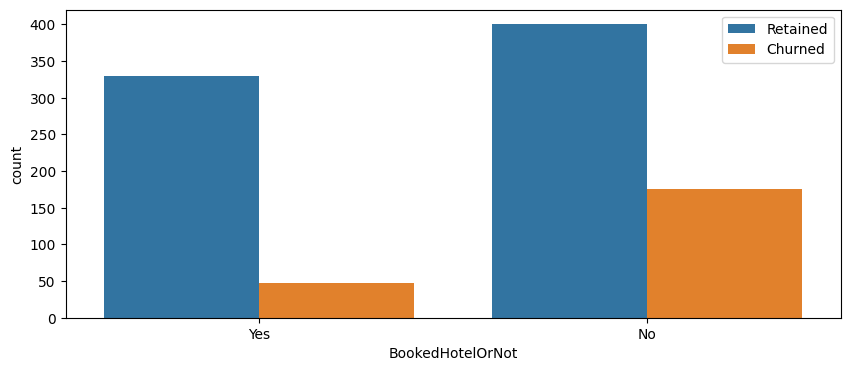

In [48]:
plt.figure(figsize=(10, 4))
sns.countplot(x="BookedHotelOrNot", data=df,hue='Target')
plt.legend(labels=["Retained", "Churned"])
plt.show()

### Preprocesing and Feature Selection

In [9]:
## Selecting independent Variables 

X = df[["Age", "FrequentFlyer", "AnnualIncomeClass", "ServicesOpted", "BookedHotelOrNot"]].values
X[:5]

array([[34, 'No', 'Middle Income', 6, 'Yes'],
       [34, 'Yes', 'Low Income', 5, 'No'],
       [37, 'No', 'Middle Income', 3, 'No'],
       [30, 'No', 'Middle Income', 2, 'No'],
       [30, 'No', 'Low Income', 1, 'No']], dtype=object)

In [10]:
## Label Encoding. 
# Create separate instances of OrdinalEncoder for each column
encoder1 = preprocessing.OrdinalEncoder()
encoder2 = preprocessing.OrdinalEncoder()
encoder3 = preprocessing.OrdinalEncoder()

# Reshaping each column to a 2D array before fitting the encoder
# This is necessary because OrdinalEncoder expects a 2D array as input
X[:, 1] = encoder1.fit_transform(X[:, 1].reshape(-1, 1)).flatten()
X[:, 2] = encoder2.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
X[:, 4] = encoder3.fit_transform(X[:, 4].reshape(-1, 1)).flatten()

# The reshape(-1, 1) operation converts the 1D array of column values into a 2D array
# with a single column, which is the format expected by the fit_transform method.
# After encoding, the flatten() method is used to convert the 2D array back to a 1D array
# so that it can be assigned to the original column in X.
X[:5]

array([[34, 0.0, 2.0, 6, 1.0],
       [34, 2.0, 1.0, 5, 0.0],
       [37, 0.0, 2.0, 3, 0.0],
       [30, 0.0, 2.0, 2, 0.0],
       [30, 0.0, 1.0, 1, 0.0]], dtype=object)

In [11]:
## changing our data into intergers as it is a requirment for Scikit-learn algorithm. 
X = X.astype(int)

In [19]:
y = df['Target'].values
y= y.astype(int)


In [21]:
### normalizing data using Standard scaling such that the mean is 0 and standard deviation is 1. 
X = preprocessing.StandardScaler().fit(X).transform(X)

### Train Test Data Splitting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (763, 5)
y_train shape (763,)


### Modeling (Logistic Regression with Scikit-learn)

In [24]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
yhat_proba = LR.predict_proba(X_test)
yhat_proba[:5]

array([[0.54349692, 0.45650308],
       [0.80178902, 0.19821098],
       [0.47712169, 0.52287831],
       [0.82809482, 0.17190518],
       [0.81371212, 0.18628788]])

## Evaluation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 17  26]
 [  9 139]]


Confusion matrix, without normalization
[[ 17  26]
 [  9 139]]


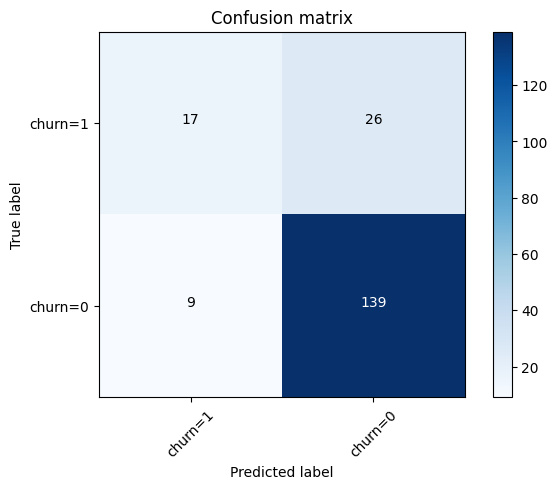

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       148
           1       0.65      0.40      0.49        43

    accuracy                           0.82       191
   macro avg       0.75      0.67      0.69       191
weighted avg       0.80      0.82      0.80       191



In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_proba)

0.4545357006674299

In [41]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7988505747126436

In [42]:
sum(y_test==yhat)/len(y_test)*100

81.67539267015707